In [7]:
import pandas as pd
df=pd.read_csv(r"/content/Mall_Customers.csv")
df
# step1:Import the required libraries
# Step2: EDA1
# STEP3: Converted categorical to Numerical values
# Step4: Kmeans model building
# Step5: Normalizing Function,Scaling the values
# between probability 0 and 1
#Step6:EDA1 AND EDA2( model buiding and model evaluation)
# Step7: fit to the model to the KMeans
# Step8:Elbow method to find optimal value of cluster

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [10]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

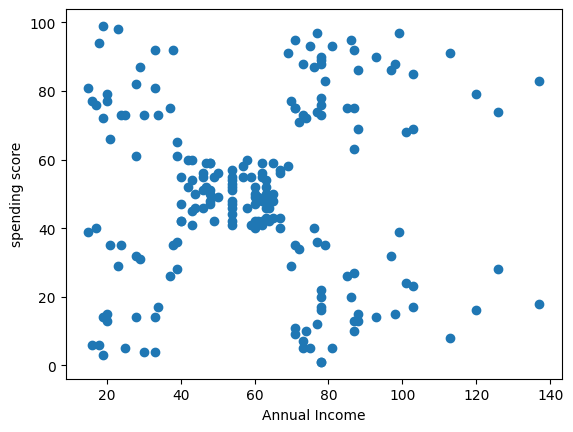

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('spending score')
plt.show()


In [25]:
from sklearn.preprocessing import normalize
df_scaled = normalize(df)

In [26]:
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)
df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.413925,0.326783,0.849635
1,0.000000,0.247025,0.176446,0.952809
2,0.037987,0.759737,0.607790,0.227921
3,0.012203,0.280676,0.195253,0.939653
4,0.018728,0.580581,0.318383,0.749137


In [27]:
df.shape

(200, 4)

In [28]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [29]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [31]:
df.drop('CustomerID',axis=1,inplace= True)
df.head()
#AXIS=1,PARTICULAR COLUMN
# CATEGORICAL VALUES TO NUMERICAL VALUES

KeyError: "['CustomerID'] not found in axis"

In [34]:
X=df_scaled.iloc[:,[2,3]].values
X
# Locking Annual Income and spending score to X variable

array([[0.32678265, 0.84963489],
       [0.17644617, 0.95280931],
       [0.60778974, 0.22792115],
       [0.19525267, 0.93965346],
       [0.31838332, 0.74913723],
       [0.2100527 , 0.93905914],
       [0.45198176, 0.15066059],
       [0.18285659, 0.95491775],
       [0.28431138, 0.04489127],
       [0.23665106, 0.89678296],
       [0.26747302, 0.19708538],
       [0.17804504, 0.92770835],
       [0.31662379, 0.23746785],
       [0.24066709, 0.9265683 ],
       [0.45431085, 0.29530205],
       [0.23693955, 0.93591123],
       [0.3904992 , 0.650832  ],
       [0.29130164, 0.91551945],
       [0.36034402, 0.45434681],
       [0.21580315, 0.91950909],
       [0.43629153, 0.63625848],
       [0.29699877, 0.90337126],
       [0.47526456, 0.09505291],
       [0.30063803, 0.87786305],
       [0.44853138, 0.22426569],
       [0.30643672, 0.89742181],
       [0.45220148, 0.51680169],
       [0.36989692, 0.80584687],
       [0.49712662, 0.53141122],
       [0.30671092, 0.92013276],
       [0.

In [46]:
# Within cluster sum of squares,Euclidean Distance
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
    Kmeans =KMeans(n_clusters=i,init='k-means++',random_state=42)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [44]:
kmeans =KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans = Kmeans.fit_predict(X)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([6, 3, 4, 3, 6, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 1, 3, 1, 3,
       4, 6, 4, 6, 1, 6, 1, 3, 4, 6, 4, 6, 4, 6, 8, 6, 8, 6, 1, 6, 1, 7,
       8, 6, 1, 7, 7, 7, 1, 7, 7, 1, 1, 1, 1, 1, 7, 1, 1, 7, 1, 1, 1, 7,
       7, 1, 7, 2, 1, 8, 1, 1, 8, 2, 2, 2, 2, 8, 1, 2, 8, 8, 7, 8, 1, 2,
       7, 8, 1, 5, 8, 5, 5, 2, 8, 2, 8, 2, 5, 8, 1, 2, 2, 5, 8, 8, 8, 8,
       8, 2, 5, 5, 5, 5, 8, 2, 8, 2, 2, 5, 2, 7, 9, 7, 9, 7, 0, 7, 0, 7,
       9, 2, 0, 7, 0, 2, 0, 2, 0, 7, 5, 7, 0, 7, 9, 2, 9, 7, 0, 7, 0, 2,
       0, 7, 0, 2, 0, 2, 9, 7, 0, 7, 9, 2, 0, 7, 9, 5, 0, 2, 0, 7, 0, 2,
       0, 2, 0, 2, 9, 2, 0, 2, 9, 2, 0, 5, 0, 2, 0, 5, 0, 2, 0, 5, 0, 5,
       0, 5], dtype=int32)

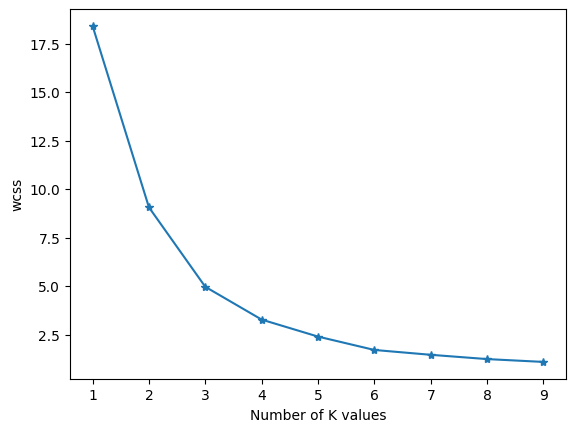

In [48]:
# Elbow method to find the cluster
plt.plot([1,2,3,4,5,6,7,8,9],wcss,marker='*')
plt.xlabel('Number of K values')
plt.ylabel('wcss')
plt.show()
# Elbow method is a graphical method to find optimal value of K in a k-means algorithm
#The elbow graph shows wcss
#The optimal value of K =4 in this example